# The 2nd question: Which movie genres do the top 300 recent movies have?

## Import packages

In [1]:
import pandas as pd
import numpy as np
import math
from numpy import int64
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import data files and clean data

### Data cleaning for 'imdb_basic' dataset

In [2]:
imdb_basic = pd.read_csv('data/title.basics.csv')
print(imdb_basic.shape)
print(imdb_basic.isna().sum())

(146144, 6)
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [3]:
#Choose data for recent movies (from 2000 to 2018)
imdb_basic = imdb_basic.loc[(imdb_basic['start_year'] >= 2000) & (imdb_basic['start_year'] <= 2018)].copy()

print(imdb_basic.isna().sum())
print(imdb_basic.shape)
imdb_basic.head()

tconst                 0
primary_title          0
original_title        19
start_year             0
runtime_minutes    26887
genres              5038
dtype: int64
(136702, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


#### Comment: 
The missing values in 'genres' columns is only about 3.6%, compared to the size of the dataset. Therefore, any NaN value will be replaced with a string called "No Defined" and will be treated as its own category 

In [4]:
imdb_basic['genres'].fillna('No Defined', inplace=True)
imdb_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [5]:
#Check to see if there is still NaN in the 'genre' column
print(imdb_basic.isna().sum())
print(imdb_basic.shape)

tconst                 0
primary_title          0
original_title        19
start_year             0
runtime_minutes    26887
genres                 0
dtype: int64
(136702, 6)


### Data cleaning for 'tmdb_movie' dataset

In [6]:
tmdb_movie = pd.read_csv('data/tmdb.movies.csv')
print(tmdb_movie.shape)
print(tmdb_movie.isna().sum())
tmdb_movie.head()

(26517, 10)
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
#Remove the 'unnamed' column and set 'id' column as index
tmdb_movie = tmdb_movie.drop('Unnamed: 0', 1)
tmdb_movie.set_index('id', inplace=True)

In [8]:
#Drop unnecessary columns 
tmdb_movie = tmdb_movie.drop(['genre_ids', 'original_language'], axis=1).copy()
tmdb_movie.head()

,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,
12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
862,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
27205,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
#change the type of 'release_date' column from object to datetime 
tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
print(tmdb_movie['release_date'].dtype)

datetime64[ns]


In [10]:
#Choose only recent movies: from 2000 to 2018
tmdb_movie = tmdb_movie[(tmdb_movie['release_date'] > '2000-01-01') 
                                      & (tmdb_movie['release_date'] <= '2018-12-31')].copy()
tmdb_movie.head()

,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,
12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
27205,Inception,27.920,2010-07-16,Inception,8.3,22186
32657,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229


### Data cleaning for 'tn_budget' dataset

In [11]:
tn_budget = pd.read_csv('data/tn.movie_budgets.csv')
print(tn_budget.shape)
print(tn_budget.isna().sum())
tn_budget.head()

(5782, 6)
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
#Rename 'movie' column and set 'id' column as index
tn_budget = tn_budget.rename(columns={'movie': 'title'}).copy()
tn_budget.set_index('id', inplace=True)
tn_budget.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#Remove the '$' sign and comma ',' and change the type to int for production_budget and worldwide_gross columns
tn_budget['production_budget'] = tn_budget['production_budget'].str.replace('$','').str.replace(',','').astype(int64)
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int64)
tn_budget['domestic_gross'] = tn_budget['domestic_gross'].str.replace('$','').str.replace(',','').astype(int64)

In [14]:
#Calculate the profit from production_budget and worldwide_gross and store it to a new column named 'profit'
tn_budget['profit'] = (tn_budget['worldwide_gross'] - tn_budget['production_budget'])
tn_budget['profit'] = tn_budget['profit'].astype(int64)

In [15]:
#change the type of 'release_date' column from object to datetime 
tn_budget['release_date'] = pd.to_datetime(tn_budget['release_date'])
#Choose only recent movies: from 2000 to 2018
tn_budget = tn_budget[(tn_budget['release_date'] > '2000-01-01') 
                                      & (tn_budget['release_date'] <= '2018-12-31')].copy()
tn_budget.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220


### Create new SQL databases and import three existing Pandas dataframes to them

In [16]:
#Create a new SQL database
conn = sqlite3.connect('genre_popularity.db')
cur = conn.cursor()

In [18]:
#Create a new table 'genres' in the SQL database
cur.execute('''CREATE TABLE genres(tconst INTEGER,
                                  primary_title TEXT,
                                  original_title TEXT,
                                  start_year INTEGER,
                                  runtime_minutes REAL,
                                  genres TEXT);''')
conn.commit()

In [19]:
#Get from Pandas DataFrame 'imdb_basic' to SQL
imdb_basic.to_sql('genres', conn, if_exists='replace')

In [20]:
#Review the data from 'genres' table
cur.execute('''SELECT * FROM genres;''')
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [i[0] for i in cur.description]
df1.head()

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
2,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
3,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [21]:
#Create a new table 'movie_pop' in the SQL database
cur.execute('''CREATE TABLE movie_pop(id INTEGER,
                                      original_title TEXT,
                                      popularity REAL,
                                      release_date DATE,
                                      title TEXT,
                                      vote_average REAL,
                                      vote_count INTEGER);''')
conn.commit()

In [22]:
#Get from Pandas DataFrame 'tmdb_movie' to SQL
tmdb_movie.to_sql('movie_pop', conn, if_exists='replace')

In [23]:
#Review the data from 'movie_pop' table
cur.execute('''SELECT * FROM movie_pop;''')
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19 00:00:00,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,How to Train Your Dragon,28.734,2010-03-26 00:00:00,How to Train Your Dragon,7.7,7610
2,10138,Iron Man 2,28.515,2010-05-07 00:00:00,Iron Man 2,6.8,12368
3,27205,Inception,27.920,2010-07-16 00:00:00,Inception,8.3,22186
4,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11 00:00:00,Percy Jackson & the Olympians: The Lightning T...,6.1,4229


In [24]:
#Create a new table 'movie_pro' in the SQL database
cur.execute('''CREATE TABLE movie_pro(release_date DATE,
                                      title TEXT,
                                      production_budget INTEGER,
                                      domestic_gross INTEGER,
                                      worldwide_gross INTEGER,
                                      profit INTERGER);''')                                
conn.commit()

In [25]:
#Get from Pandas DataFrame 'tn_budget' to SQL
tn_budget.to_sql('movie_pro', conn, if_exists='replace')

In [26]:
#Review the data from 'mov_pro' table
cur.execute('''SELECT * FROM movie_pro;''')
df3 = pd.DataFrame(cur.fetchall())
df3.columns = [i[0] for i in cur.description]
df3.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18 00:00:00,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20 00:00:00,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,4,2015-05-01 00:00:00,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
3,5,2017-12-15 00:00:00,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
4,6,2015-12-18 00:00:00,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220


## Common genres of the most 300 popular movies from 2000 to 2018

In [27]:
#Choose only 300 movies (from 2000 to 2018) that have popularity rates in descending order
cur.execute('''SELECT movie_pop.*, genres.original_title, start_year, genres
               FROM genres
               JOIN movie_pop
               ON genres.original_title = movie_pop.original_title
               ORDER BY popularity DESC
               LIMIT 300;''')
top_gen_pop = pd.DataFrame(cur.fetchall())
top_gen_pop.columns = [i[0] for i in cur.description]
top_gen_pop.head(10)

,id,original_title,popularity,release_date,title,vote_average,vote_count,original_title,start_year,genres
0,299536,Avengers: Infinity War,80.773,2018-04-27 00:00:00,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
1,245891,John Wick,78.123,2014-10-24 00:00:00,John Wick,7.2,10081,John Wick,2014,"Action,Crime,Thriller"
2,324857,Spider-Man: Into the Spider-Verse,60.534,2018-12-14 00:00:00,Spider-Man: Into the Spider-Verse,8.4,4048,Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation"
3,122917,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17 00:00:00,The Hobbit: The Battle of the Five Armies,7.3,8392,The Hobbit: The Battle of the Five Armies,2014,"Adventure,Fantasy"
4,24428,The Avengers,50.289,2012-05-04 00:00:00,The Avengers,7.6,19673,The Avengers,2012,"Action,Adventure,Sci-Fi"
5,118340,Guardians of the Galaxy,49.606,2014-08-01 00:00:00,Guardians of the Galaxy,7.9,17958,Guardians of the Galaxy,2014,"Action,Adventure,Comedy"
6,335984,Blade Runner 2049,48.571,2017-10-06 00:00:00,Blade Runner 2049,7.4,6679,Blade Runner 2049,2017,"Drama,Mystery,Sci-Fi"
7,335984,Blade Runner 2049,48.571,2017-10-06 00:00:00,Blade Runner 2049,7.4,6679,Blade Runner 2049,2017,"Drama,Mystery,Sci-Fi"
8,338952,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16 00:00:00,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,Fantastic Beasts: The Crimes of Grindelwald,2018,"Adventure,Family,Fantasy"
9,404368,Ralph Breaks the Internet,48.057,2018-11-21 00:00:00,Ralph Breaks the Internet,7.2,2626,Ralph Breaks the Internet,2018,"Adventure,Animation,Comedy"


In [28]:
#Make each row in the 'genres' column to a list
top_gen_pop['genres'] = top_gen_pop['genres'].map(lambda x: x.split(',') if x else x)
top_gen_pop['genres'].head()

0       [Action, Adventure, Sci-Fi]
1         [Action, Crime, Thriller]
2    [Action, Adventure, Animation]
3              [Adventure, Fantasy]
4       [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [29]:
#Split the types of genres into a big list
all_genres =[]
for genre in top_gen_pop['genres']:
    all_genres += genre

all_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Action',
 'Adventure',
 'Animation',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Drama',
 'Family',
 'Action',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Adventure',
 'Thriller',
 'No Defined',
 'Action',
 'Adventure',
 'History'

In [30]:
#Convert any of the iterable to sequence of iterable genres with dintinct genres
unique_genres = set(all_genres)

In [31]:
#Count the number of each genre
num_genre = {}
for genre in unique_genres:
    num_genre[genre] = all_genres.count(genre)

num_genre

{'Fantasy': 48,
 'Sci-Fi': 58,
 'Musical': 9,
 'Crime': 40,
 'Mystery': 26,
 'Biography': 16,
 'Comedy': 58,
 'Thriller': 46,
 'History': 8,
 'Animation': 25,
 'Western': 1,
 'Drama': 102,
 'No Defined': 5,
 'Action': 143,
 'Romance': 12,
 'Family': 25,
 'Horror': 22,
 'Documentary': 9,
 'Sport': 6,
 'Adventure': 139,
 'War': 2,
 'Music': 5}

In [32]:
#Make 2 lists for name of genre and number of genre
genres = []
counts = []

for genre, count in num_genre.items():
    genres.append(genre)
    counts.append(count)

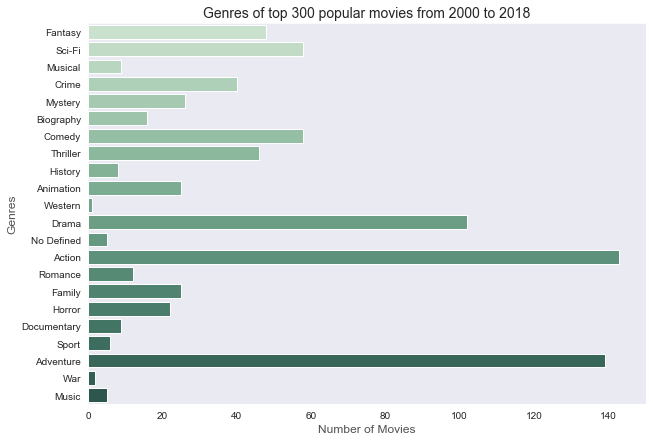

In [33]:
#graph to see the trend
plt.figure(figsize=(10, 7))
sns.set_style('dark')
gr1 = sns.barplot(x=counts, y=genres,
                  ci=None, palette='ch:2.5,-.2,dark=.3')
gr1.set_xlabel('Number of Movies', fontsize=12, alpha=0.8)
gr1.set_ylabel('Genres', fontsize=12, alpha=0.8)
gr1.set_title('Genres of top 300 popular movies from 2000 to 2018', fontsize=14)
plt.show()

#### Comment:
The top 300 popular recent movies have genres in Action, Adventure, Drama, Comedy, and Sci-Fi

## Common genres of the most 300 profitable from 2000 to 2018

In [34]:
#Connect 'genre' and 'movie_pro' tables, choose 300 movies from 2000 to 2018 that are the most profitable
cur.execute('''SELECT movie_pro.*, original_title, start_year, genres
               FROM genres
               JOIN movie_pro
               ON genres.original_title = movie_pro.title
               ORDER BY profit DESC
               LIMIT 300;''')
top_pro_genre = pd.DataFrame(cur.fetchall())
top_pro_genre.columns = [i[0] for i in cur.description]
print(top_pro_genre.shape)
top_pro_genre.head()

(300, 10)


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit,original_title,start_year,genres
0,7,2018-04-27 00:00:00,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
1,34,2015-06-12 00:00:00,Jurassic World,215000000,652270625,1648854864,1433854864,Jurassic World,2015,"Action,Adventure,Sci-Fi"
2,27,2012-05-04 00:00:00,The Avengers,225000000,623279547,1517935897,1292935897,The Avengers,2012,"Action,Adventure,Sci-Fi"
3,42,2018-02-16 00:00:00,Black Panther,200000000,700059566,1348258224,1148258224,Black Panther,2018,"Action,Adventure,Sci-Fi"
4,13,2018-06-22 00:00:00,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi"


In [35]:
#Make each row in the 'genres' column to a list
top_pro_genre['genres'] = top_pro_genre['genres'].map(lambda x: x.split(',') if x else x)
top_pro_genre['genres'].head()

0    [Action, Adventure, Sci-Fi]
1    [Action, Adventure, Sci-Fi]
2    [Action, Adventure, Sci-Fi]
3    [Action, Adventure, Sci-Fi]
4    [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [36]:
#Split the types of genres into a big list
all_genres_pro =[]
for genre in top_pro_genre['genres']:
    all_genres_pro += genre

all_genres_pro

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Sport',
 'Adventure',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Musical',
 'Family',
 'Fantasy',
 'Musical',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Drama',
 'Music',
 'Adventure',
 'Family',
 'Fantasy',
 'Documentary',
 'Fantasy',
 'Musical',
 'Adventure',
 'Animation',
 'Comedy',
 'Ad

In [37]:
#Convert any of the iterable to sequence of iterable genres with dintinct genres
unique_genres_pro = set(all_genres_pro)

In [38]:
#Count the number of each genre
num_genre_pro = {}
for genre in unique_genres_pro:
    num_genre_pro[genre] = all_genres_pro.count(genre)

num_genre_pro

{'Fantasy': 33,
 'Sci-Fi': 53,
 'Musical': 6,
 'Crime': 13,
 'Mystery': 15,
 'Biography': 15,
 'Comedy': 77,
 'Thriller': 40,
 'History': 6,
 'Animation': 56,
 'Western': 2,
 'Drama': 73,
 'No Defined': 4,
 'Action': 123,
 'Romance': 13,
 'Family': 27,
 'Horror': 18,
 'Documentary': 26,
 'Sport': 4,
 'Adventure': 144,
 'War': 2,
 'Music': 4}

In [39]:
#Make 2 lists for name of genre and number of genre
genres_pro = []
counts_pro = []

for genre, count in num_genre_pro.items():
    genres_pro.append(genre)
    counts_pro.append(count)

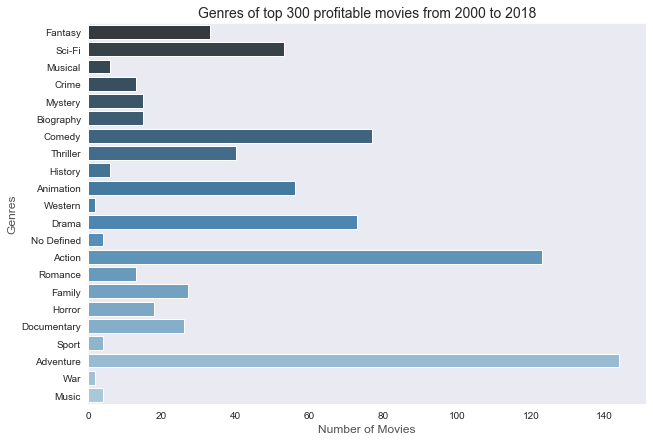

In [40]:
#graph to see the trend
plt.figure(figsize=(10, 7))
sns.set_style('dark')
gr2 = sns.barplot(x=counts_pro, y=genres_pro,
                  ci=None, palette='Blues_d')
gr2.set_xlabel('Number of Movies', fontsize=12, alpha=0.8)
gr2.set_ylabel('Genres', fontsize=12, alpha=0.8)
gr2.set_title('Genres of top 300 profitable movies from 2000 to 2018', fontsize=14)
plt.show()

#### Comment:
The top 300 profitable recent movies have genres in Action, Adventure, Comedy, Drama, Animation, and Sci-Fi

## FINAL RESULTS

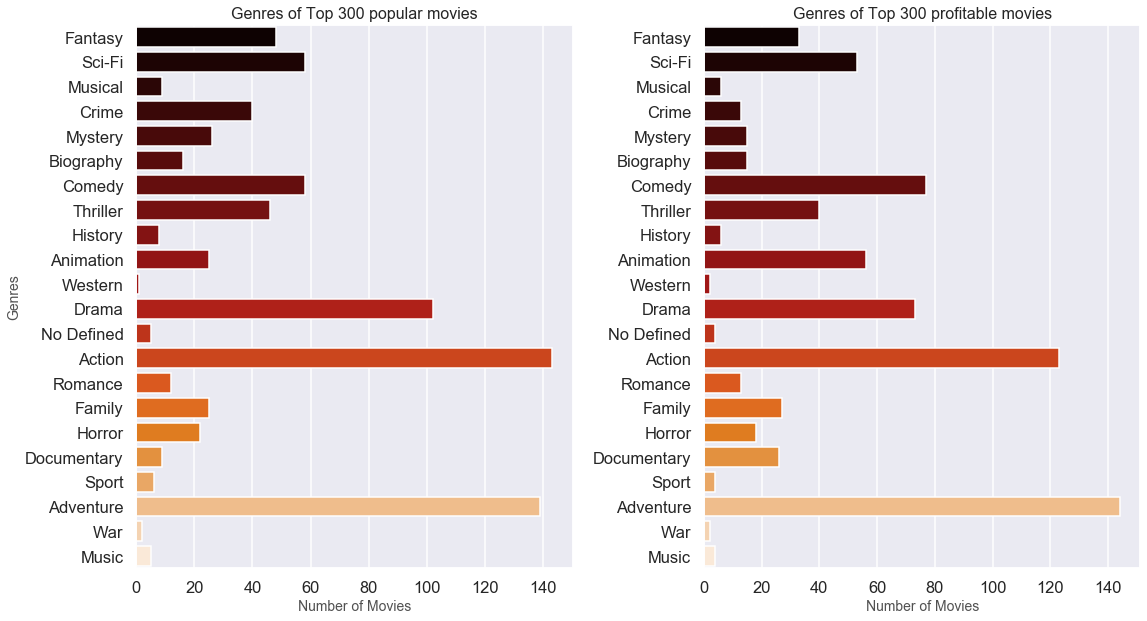

In [47]:
top_genre = plt.figure(figsize=(18, 10))
g_pop = top_genre.add_subplot(121)
g_pro = top_genre.add_subplot(122)
sns.set(style='darkgrid', context='talk')

sns.barplot(x=counts, y=genres, ax=g_pop, 
            ci=None, palette='gist_heat')
sns.barplot(x=counts_pro, y=genres_pro, ax=g_pro, 
            ci=None, palette='gist_heat')

g_pop.set_title('Genres of Top 300 popular movies', fontsize=16)
g_pop.set_xlabel('Number of Movies', fontsize=14, alpha=0.8)
g_pop.set_ylabel('Genres', fontsize=14, alpha=0.8)

g_pro.set_title('Genres of Top 300 profitable movies', fontsize=16)
g_pro.set_xlabel('Number of Movies', fontsize=14, alpha=0.8)
g_pro.set_ylabel('', fontsize=14, alpha=0.8)

plt.subplots_adjust(wspace = 0.3)
plt.show()